 Convolutional Neural Networks (CNN)

# Installation

In [ ]:
import tensorflow
tensorflow.__version__

'2.15.0'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the fashion mnist data set: https://www.kaggle.com/datasets/zalando-research/fashionmnist
* 60,000 train images
* 10,000 test images
* image size (28,28)

**Labels**

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot


The data set is balanced!

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
from collections import Counter
Counter(y_train)

Counter({9: 6000,
         0: 6000,
         3: 6000,
         2: 6000,
         7: 6000,
         5: 6000,
         1: 6000,
         6: 6000,
         4: 6000,
         8: 6000})

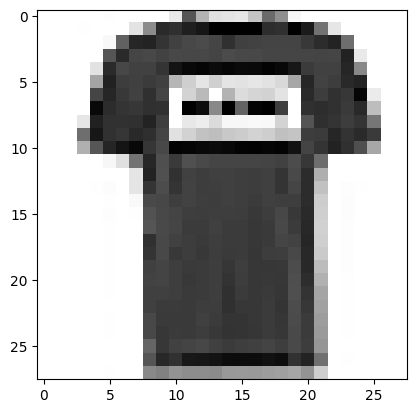

In [ ]:
plt.imshow(x_train[1], cmap='Greys')
plt.show()

In [ ]:
y_train[1]

0

There are two ways we can handle the target variable:
1. Using one-hot encoding + categorical_crossentropy loss function
2. Using integer labels  + sparse_categorical_crossentropy loss function.


When it comes to multi-class classification, it may not make a big difference whether you use integer labels or one-hot encoded labels, as long as the model is able to learn to predict the correct class. However, there are several benefits to using one-hot encoding for categorical variables in general:
* No implied ordering
* Better generalization: One-hot encoding can lead to better generalization to new data because it allows the model to learn more distinct boundaries between the classes. With integer labels, the model may be tempted to interpolate between adjacent classes, which can lead to overfitting on the training data.
* Easier to interpret: One-hot encoding provides a clear and interpretable representation of the classes. Each class is represented by a binary vector, where each element corresponds to a different class.


In [ ]:
y_train.shape

(60000,)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_ohe = to_categorical(y_train, num_classes=10)
y_train_ohe.shape

(60000, 10)

In [ ]:
# alternative way to do one hot encoding
import tensorflow as tf
y_test_ohe = tf.one_hot(y_test, depth=10)
y_test_ohe.shape

TensorShape([10000, 10])

# Creating an ANN model as benchmark
let's start by an ANN model.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
print(f'Train set shape is: {x_train.shape}')
print(f'Test set shape is: {x_test.shape}')

Train set shape is: (60000, 28, 28)
Test set shape is: (10000, 28, 28)


In [ ]:
# we need to flatten images and pass it to a FCN.
x_train_ann = x_train.reshape(60000, 28*28)
x_train_ann = x_train_ann / 255.0

x_test_ann = x_test.reshape(10000, 28*28)
x_test_ann = x_test_ann / 255.0

In [ ]:
x_train_ann.shape

(60000, 784)

In [ ]:
ann_model = keras.Sequential(name="ann_mnist")
ann_model.add(layers.Input(shape=(784,))) # this is the shape of each sample!
ann_model.add(layers.Dense(units = 512, activation = 'relu', name="first_layer"))

#output layer
ann_model.add(layers.Dense(units = 10, activation = 'softmax', name="output_layer"))

In [ ]:
ann_model.summary()

Model: "ann_mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 512)               401920    
                                                                 
 output_layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


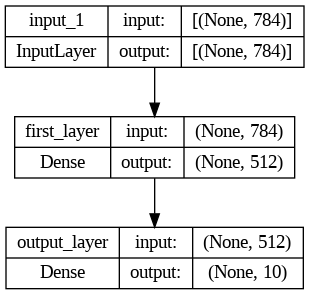

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming 'ann_model' is your defined model
plot_model(ann_model, to_file='ann_model_architecture.png', show_shapes=True)


In [ ]:

import matplotlib.pyplot as plt

# Assuming 'ann_model' is your defined model

plot_model(ann_model, to_file='ann_model_architecture.png', show_shapes=True, show_layer_names=True)

# Load the generated image using Matplotlib
img = plt.imread('ann_model_architecture.png')
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


In [ ]:
#params
784*512+512


401920

In [ ]:
512*10+10

5130

In [ ]:
ann_model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="ANN_benchmark.h5",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [ ]:
ann_model.fit(x_train_ann, y_train_ohe, validation_data=(x_test_ann, y_test_ohe), epochs=60, batch_size=128, callbacks=callback_list)

Epoch 1/60
469/469 [==============================] - 2s 5ms/step - loss: 0.1320 - accuracy: 0.9515 - val_loss: 0.4257 - val_accuracy: 0.8909
Epoch 2/60
469/469 [==============================] - 2s 4ms/step - loss: 0.1267 - accuracy: 0.9541 - val_loss: 0.4240 - val_accuracy: 0.8906
Epoch 3/60
469/469 [==============================] - 2s 4ms/step - loss: 0.1258 - accuracy: 0.9543 - val_loss: 0.4421 - val_accuracy: 0.8916
Epoch 4/60
469/469 [==============================] - 2s 3ms/step - loss: 0.1220 - accuracy: 0.9557 - val_loss: 0.4427 - val_accuracy: 0.8921
Epoch 5/60
469/469 [==============================] - 2s 3ms/step - loss: 0.1190 - accuracy: 0.9564 - val_loss: 0.4417 - val_accuracy: 0.8911
Epoch 6/60
469/469 [==============================] - 2s 3ms/step - loss: 0.1165 - accuracy: 0.9574 - val_loss: 0.4885 - val_accuracy: 0.8823
Epoch 7/60
469/469 [==============================] - 2s 4ms/step - loss: 0.1155 - accuracy: 0.9585 - val_loss: 0.4507 - val_accuracy: 0.8911
Epoch 

In [ ]:
test_model = keras.models.load_model("ANN_benchmark.h5")
test_model.evaluate(x_test_ann, y_test_ohe)

313/313 [==============================] - 1s 2ms/step - loss: 0.3413 - accuracy: 0.8862


[0.34131428599357605, 0.8862000107765198]

ANN accuracy in the test set is around 89%. We want to see how CNN improves this accuracy.

# Convolutional Neural Networks (CNN)

In [ ]:
# reshaping
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape((60000, 28,28,1))
x_train = x_train / 255.0

x_test = x_test.reshape((10000, 28,28,1))
x_test  = x_test / 255.0

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

## Creating a CNN model:

This is the benchmark CNN we build. No regularization (no drop out or data augmentation)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# we will be using functional api

def CNN_builder():
    inputs= keras.Input(shape=(28,28,1), name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)

    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name='my_first_CNN_model')

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
model = CNN_builder()
model.summary()

Model: "my_first_CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)        18496     
                                                                 
 pooling_2 (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 conv_layer_3 (Conv2D)       (None, 3, 3, 128)         73856     
                                                                 
 flattening_layer (Flatten)  (None, 1152)       

In [ ]:
# params
1*(3*3)*32 + 32

320

In [ ]:
32*(3*3)*64+64

18496

In [ ]:
64*(3*3)*128+128

73856

In [ ]:
3*3*128

1152

In [ ]:
1152*10+10

11530

output shape:
* channels are the number of filters
* new size = $floor(\frac{n_{old} + 2p - f}{s} + 1)$
* each pooling will half the width and height

In [ ]:
# for example, the output shape of conv_layer 1 is (None, 26,26, 32)
np.floor(((28+0-3)/1)+1)

26.0

## Model fit


In [ ]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="CNN_basic.h5",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [ ]:
history = model.fit(x=x_train, y=y_train_ohe, validation_data=(x_test, y_test_ohe),
          epochs=30, batch_size=128, callbacks=callback_list)

Epoch 1/30
469/469 [==============================] - 6s 6ms/step - loss: 0.5905 - accuracy: 0.7836 - val_loss: 0.4218 - val_accuracy: 0.8543
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 0.3643 - accuracy: 0.8664 - val_loss: 0.3490 - val_accuracy: 0.8761
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.3075 - accuracy: 0.8883 - val_loss: 0.3127 - val_accuracy: 0.8871
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2776 - accuracy: 0.8979 - val_loss: 0.3007 - val_accuracy: 0.8908
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2531 - accuracy: 0.9088 - val_loss: 0.2965 - val_accuracy: 0.8944
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.2329 - accuracy: 0.9141 - val_loss: 0.3377 - val_accuracy: 0.8823
Epoch 7/30
469/469 [==============================] - 3s 7ms/step - loss: 0.2174 - accuracy: 0.9205 - val_loss: 0.2694 - val_accuracy: 0.9010
Epoch 

In [ ]:
test_model = keras.models.load_model("CNN_basic.h5")
test_model.evaluate(x_test, y_test_ohe)

313/313 [==============================] - 1s 3ms/step - loss: 0.2586 - accuracy: 0.9117


[0.2586197853088379, 0.9117000102996826]

As you can see, the CNN performs better in the test set with 91% accuracy.

## Model evaluation

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
metrics = pd.DataFrame(history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.590466,0.783583,0.421806,0.8543
1,0.364339,0.866367,0.348952,0.8761
2,0.307549,0.888283,0.312684,0.8871
3,0.277640,0.897883,0.300744,0.8908
4,0.253085,0.908767,0.296473,0.8944


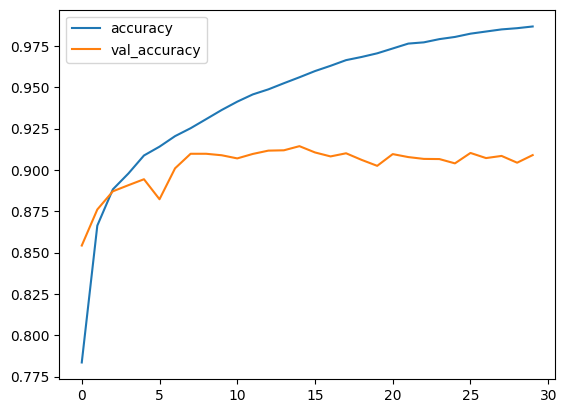

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

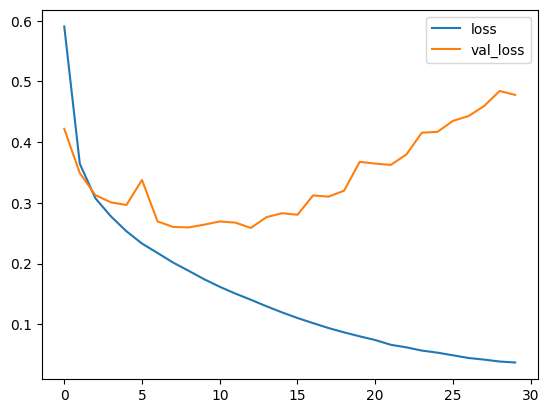

In [ ]:
metrics[['loss','val_loss']].plot()
plt.show()

# Data Augmentation




In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

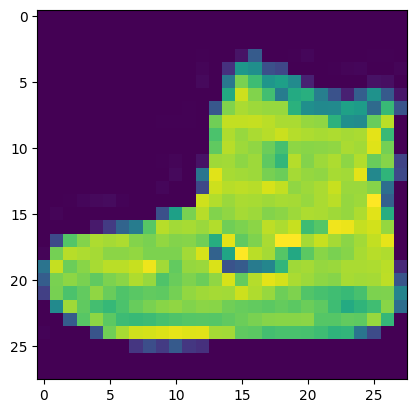

In [ ]:
plt.imshow(x_train[0].reshape(28,28))
plt.show()

In [ ]:
image = x_train[0]
image.shape

(28, 28, 1)

In [ ]:
data_augmentation(image).numpy().shape

(28, 28, 1)

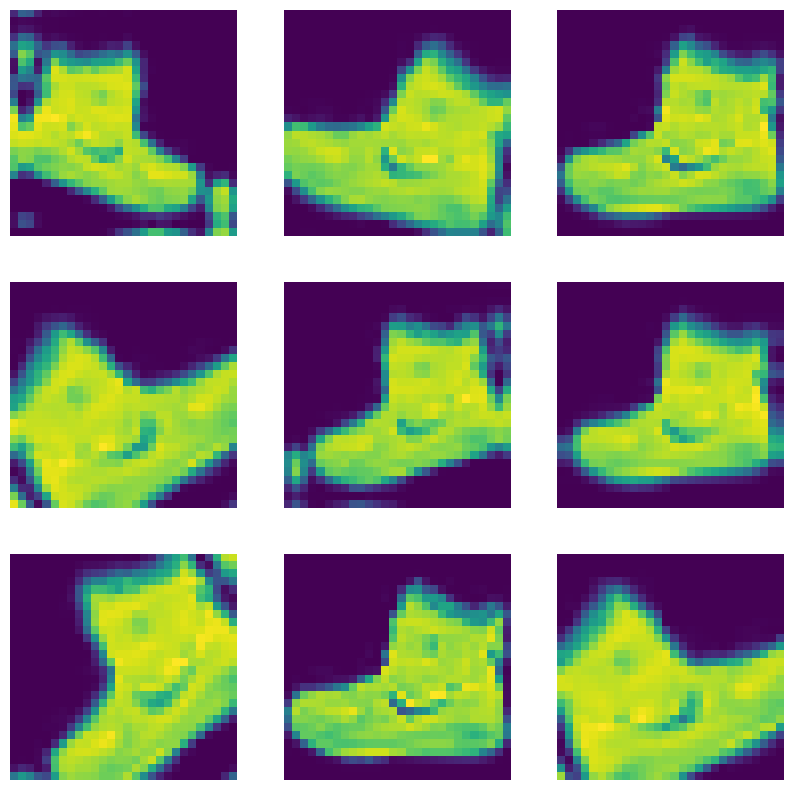

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_images = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)

    plt.imshow(augmented_images.numpy().reshape(28,28))
    plt.axis("off")

In [ ]:
x= data_augmentation(x_train)
x.shape


TensorShape([60000, 28, 28])

In [ ]:
x = tf.expand_dims(x, axis=-1)
x.shape

TensorShape([60000, 28, 28, 1])

In [ ]:
x = tf.squeeze(x, axis=-1)
x.shape

TensorShape([60000, 28, 28])

In [ ]:
def CNN_builder_augmented():
  inputs= keras.Input(shape=(28,28,1), name='Input layer')
  x = data_augmentation(inputs)
  x = layers.Rescaling(1./255)(x)  # Add rescaling to normalize the data
  # Explicitly set the shape to ensure the augmented data is in the correct format
  x = layers.Reshape((28, 28, 1))(x)
  x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(x)
  x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
  x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
  x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
  x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
  x = layers.Flatten(name="flattening_layer")(x)
  x = layers.Dropout(0.5)(x)

  outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

  model = keras.Model(inputs= inputs , outputs=outputs, name='CNN_augmented_model')

  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
model_augmented = CNN_builder_augmented()
model_augmented.summary()


Model: "CNN_augmented_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 sequential (Sequential)     (28, 28, 1)               0         
                                                                 
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv_layer_1 (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 pooling_1 (MaxPooling2D)    (None, 13, 13, 32)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 11, 11, 64)

## Model fit


In [ ]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="CNN_augmented.h5",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [ ]:
history = model_augmented.fit(x=x_train, y=y_train_ohe, validation_data=(x_test, y_test_ohe),
          epochs=30, batch_size=128, callbacks=callback_list)

Epoch 1/30
469/469 [==============================] - 4s 8ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/30
 28/469 [>.............................] - ETA: 2s - loss: 2.3027 - accuracy: 0.0988

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/30
469/469 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/30
469/469 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 8/30
469/469 [==============================] - 4s 8ms/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 9/30
469/46

In [ ]:
model_augmented.evaluate(x_test, y_test_ohe)

313/313 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8597


[0.38848817348480225, 0.8597000241279602]

here we got 85 percent accuracy

# Done